In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [0]:
# !pip uninstall xgboost

In [0]:
# !pip install /content/mydrive/My\ Drive/ML_Projects/Kaggle/Santander/xgboost_gpuwhl/xgboost-0.81-py2.py3-none-manylinux1_x86_64.whl

In [0]:
# import os
# os._exit(00)

In [0]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [0]:
df_train = pd.read_csv('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/dataset/train.csv')

In [0]:
df_test = pd.read_csv('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/dataset/test.csv')

In [8]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


## EDA

In [9]:
df_train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [10]:
df_train.shape

(200000, 202)

In [0]:
# df_train.dtypes

In [0]:
dtypes = df_train.dtypes

In [0]:
is_float = []
not_floats = []
for dtype in dtypes:
    if dtype == 'float64':
        is_float.append(True)
    else:
        not_floats.append(dtype)

In [14]:
len(dtypes)

202

In [15]:
sum(is_float)

200

In [16]:
print(not_floats)

[dtype('O'), dtype('int64')]


In [0]:
# df_train.isnull().sum()

In [18]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


#### Extracting target variable from the dataframe, and independent feature variables into y and X respectively

In [0]:
y = df_train['target']

In [0]:
X = df_train.iloc[:, 2:]

In [0]:
import seaborn as sns

### Checking distribution of target variable values

#### <font color='green'>Dataset is imbalanced</font>
Class '0' has much more examples than Class '1'

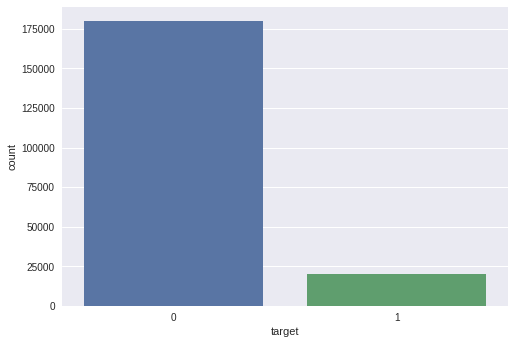

In [22]:
sns.countplot(y)

In [23]:
y.value_counts()

0    179902
1     20098
Name: target, dtype: int64

### Univariate Analysis

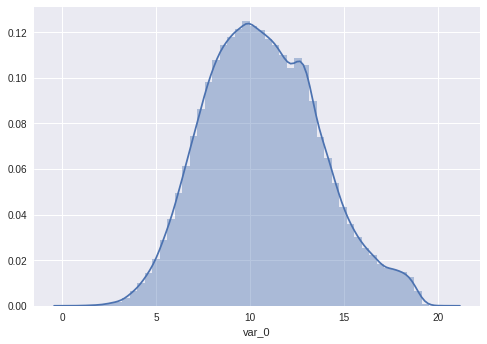

In [24]:
sns.distplot(X.iloc[:, 0])

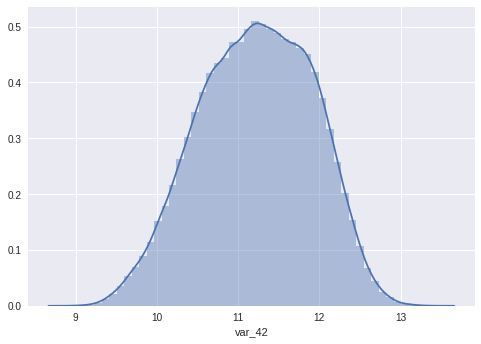

In [25]:
sns.distplot(X.iloc[:, 42])

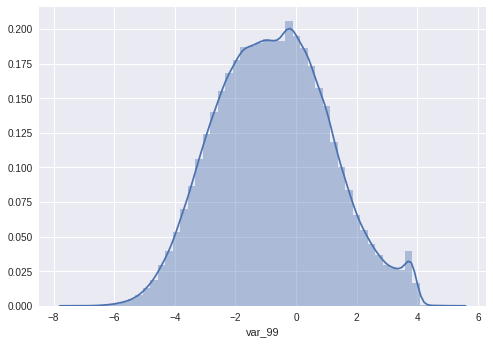

In [26]:
sns.distplot(X.iloc[:, 99])

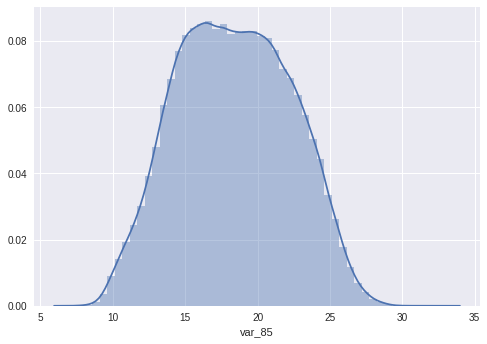

In [27]:
sns.distplot(X.iloc[:, 85])

#### <font color='orange'>No feature seem to have values concentrated around some particular value.</font>
Let's confirm


In [0]:
import matplotlib.pyplot as plt

In [29]:
X.shape

(200000, 200)

In [30]:
fig = plt.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

In [0]:
def matrix_plotter(m, n, feature_columns):
    plot_count = 1
    plt.tight_layout()
    for feature_column in feature_columns:
        plt.subplot(m, n, plot_count)
        sns.distplot(X.iloc[:, feature_column])
        plot_count += 1
    plt.show()

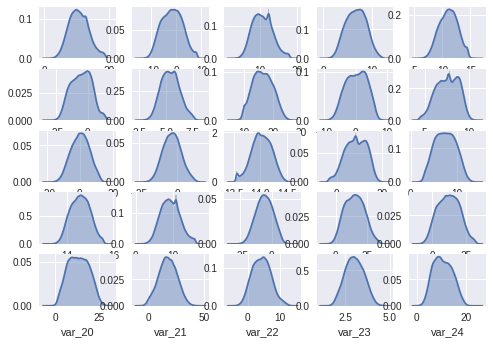

In [32]:
matrix_plotter(5, 5, [x for x in range(25)])

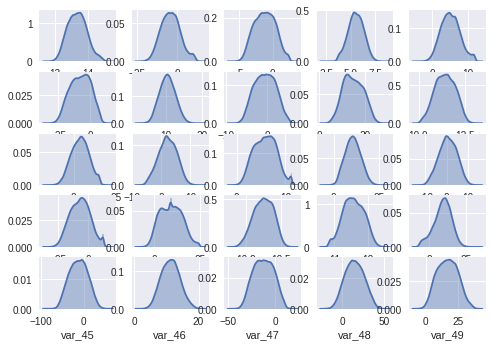

In [33]:
matrix_plotter(5, 5, [x for x in range(25, 50)])

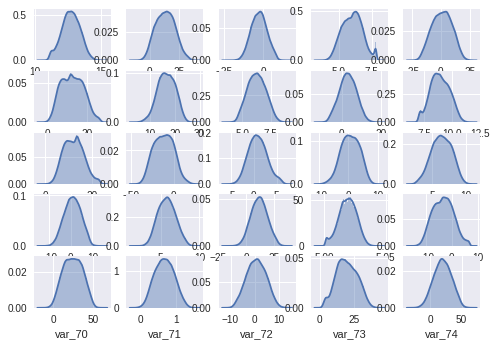

In [34]:
matrix_plotter(5, 5, [x for x in range(50, 75)])

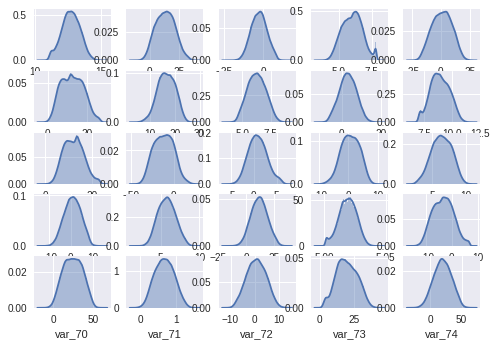

In [35]:
matrix_plotter(5, 5, [x for x in range(50, 75)])

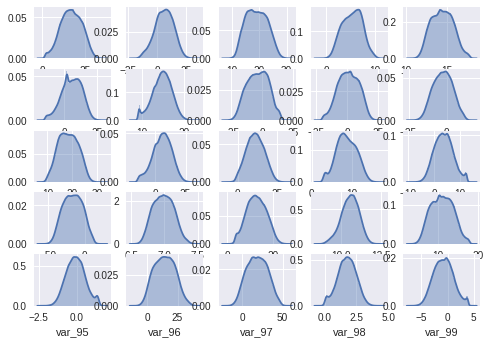

In [36]:
matrix_plotter(5, 5, [x for x in range(75, 100)])

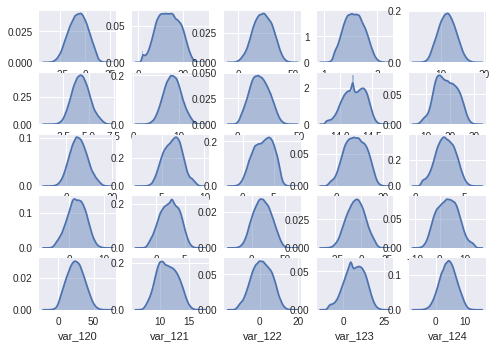

In [37]:
matrix_plotter(5, 5, [x for x in range(100, 125)])

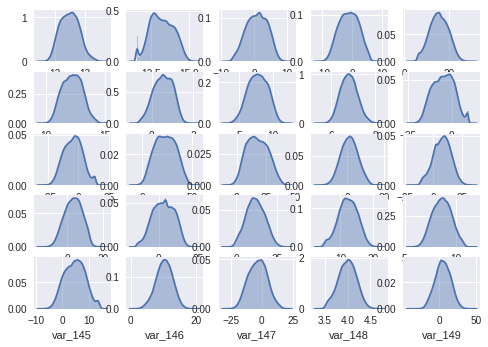

In [38]:
matrix_plotter(5, 5, [x for x in range(125, 150)])

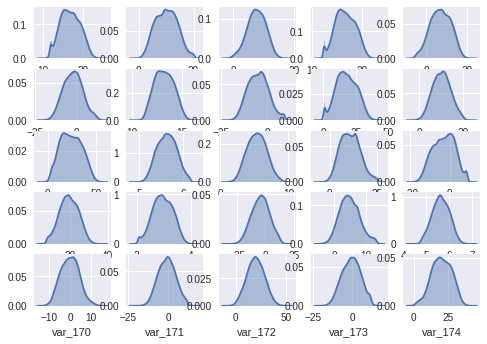

In [39]:
# plot of feature number 162 seems suspicious
matrix_plotter(5, 5, [x for x in range(150, 175)])

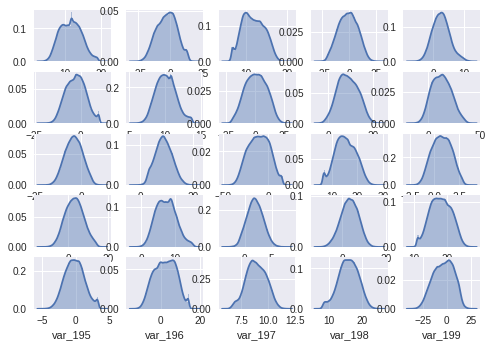

In [40]:
matrix_plotter(5, 5, [x for x in range(175, 200)])

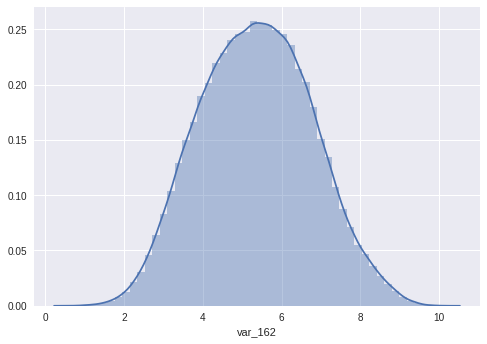

In [41]:
# the values are nicely distributed
sns.distplot(X.iloc[:, 162])

In [42]:
X.iloc[162].describe()

count    200.000000
mean       7.149593
std       10.120900
min      -37.400500
25%        2.152175
50%        6.539800
75%       12.812125
max       49.147000
Name: 162, dtype: float64

## Feature Scaling

In [0]:
## Chosen model is XGBoost (ensemble learning model that uses gradient boosted trees as base learners)
## so, feature scaling is unnecessary

# Model Building

In [0]:
# Split into train and test sets

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [0]:
from xgboost import XGBClassifier

#### Hyperparameter tuning

In an ideal world, with infinite resources and where time is not an issue, we could run a giant grid search with all the parameters together and find the optimal set of parameters.

In fact, we might even be able to do that with really small datasets, but as the data is not small in this problem, training time grows too, and thus, finding an optimum combination out of all possible combinations will be very expensive. For this reason it is important to understand the role of the parameters and focus on the steps that we expect to impact our results the most. 

In [0]:
from sklearn.model_selection import GridSearchCV

#### 1. Parameter Guessing

Training with values that worked well in some kaggle and AV competitions. The performance on X_test can be used as  a benchmark for new models.

In [0]:
import pickle as pkl
import os

In [0]:
if os.path.exists('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/xgbc.pkl'):
  with open('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/xgbc.pkl', 'rb') as xgbc:
    xgbc = pkl.load(xgbc)
else:
  xgbc = XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=5,
                   min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                   objective= 'binary:logistic', nthread=4, scale_pos_weight=3,seed=27)
  xgbc.fit(X_train, y_train)
  with open('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/xgbc.pkl', 'wb') as xgbc_f:
    pkl.dump(xgbc, xgbc_f)

In [0]:
y_pred = xgbc.predict(X_test)

In [0]:
from sklearn.metrics import auc, roc_curve

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

In [54]:
auc(fpr, tpr)

0.6592349379968018

#### <font color='orange'>Tuned model should do better than this.</font>

#### 2. Tuning with grid search

Initialising parameters with default values for the moment. These will be tuned in a sequence so as the get the best possible values, if not optimum

In [0]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'scale_pos_weight': 1,
    # Other parameters
    'tree_method':'gpu_hist',

    'objective':'binary:logistic'
}

In [56]:
(y_train.values.shape)

(160000,)

In [0]:
import xgboost as xgb

In [0]:
dtrain = xgb.DMatrix(X_train.values, label=y_train.values)

In [0]:
num_boost_round = 999

#### <font color='blue'>1. Tuning max_depth and min_child_weight </font>
These parameters add constraints on the architecture of the trees.
`max_depth` is the maximum number of nodes allowed from the root to the farthest leaf of a tree. Deeper trees can model more complex relationships by adding more nodes, but as we go deeper, splits become less relevant and are sometimes only due to noise, causing the model to overfit.
`min_child_weight` is the minimum weight (or number of samples if all samples have a weight of 1) required in order to create a new node in the tree. A smaller `min_child_weight` allows the algorithm to create children that correspond to fewer samples, thus allowing for more complex trees, but again, more likely to overfit.

*Both parameters balance the bias-variance tradeoff, hence should be tuned together*

In [0]:
gridsearch_max_depths = list(range(5, 10, 2))
gridsearch_min_child_weights = list(range(5, 10, 2))

In [0]:
gridsearch_params = [(max_depth, min_child_weight)
                     for max_depth in gridsearch_max_depths
                     for min_child_weight in gridsearch_min_child_weights
                    ]

In [0]:
if not os.path.exists('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/params.pkl'):
  best_auc = 0
  best_params = None
  for max_depth, min_child_weight in gridsearch_params:
      print('CV with max_depth = {}, min_child_weight = {}'.format(max_depth, min_child_weight))
      params['max_depth'] = max_depth
      params['min_child_weight'] = min_child_weight

      cv_results = xgb.cv(params,
                         dtrain,
                         num_boost_round=num_boost_round,
                         seed=1,
                         nfold=5,
                         metrics={'auc'},
                         early_stopping_rounds=10
                         )
      #update best auc
      mean_auc = cv_results['test-auc-mean'].max()
      boost_rounds = cv_results['test-auc-mean'].argmax()
      print("\tAUC {} for {} rounds".format(mean_auc, boost_rounds))

      if best_auc<mean_auc:
        best_auc = mean_auc
        best_params = (max_depth, min_child_weight)

      print("Best params: {}, {}, AUC: {}".format(best_params[0], best_params[1], best_auc))

  # reset the best parameters in the params dictionary
  params['max_depth'] = best_params[0]
  params['min_child_weight'] = best_params[1]
  
  with open('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/params.pkl', 'wb') as params_pkl:
    pkl.dump(params, params_pkl)

else:
  with open('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/params.pkl', 'rb') as params_pkl:
    params = pkl.load(params_pkl)

In [63]:
params

{'colsample_bytree': 1,
 'eta': 0.3,
 'max_depth': 9,
 'min_child_weight': 7,
 'objective': 'binary:logistic',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'gpu_hist'}

In [64]:
X_train.shape

(160000, 200)

#### <font color='blue'>2. Tune fraction of features and fraction of rows to build a tree on</font>

In [0]:
gridsearch_subsamples = list(range(7, 11))
gridsearch_featuresamples = list(range(7, 11))

In [0]:
gridsearch_params = [(subsample/10., featuresample/10.) for subsample in gridsearch_subsamples for featuresample in gridsearch_featuresamples]

In [67]:
gridsearch_params

[(0.7, 0.7),
 (0.7, 0.8),
 (0.7, 0.9),
 (0.7, 1.0),
 (0.8, 0.7),
 (0.8, 0.8),
 (0.8, 0.9),
 (0.8, 1.0),
 (0.9, 0.7),
 (0.9, 0.8),
 (0.9, 0.9),
 (0.9, 1.0),
 (1.0, 0.7),
 (1.0, 0.8),
 (1.0, 0.9),
 (1.0, 1.0)]

In [0]:
if not os.path.exists('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/params_2.pkl'):
  best_auc = 0
  best_params = None
  for subsample, featuresample in gridsearch_params:
      print('CV_with_subsamples = {}, CV_with_feature_samples = {}'.format(subsample, featuresample))
      params['subsample'] = subsample
      params['colsample_bytree'] = featuresample

      cv_results = xgb.cv(params,
                         dtrain,
                         num_boost_round=num_boost_round,
                         seed=1,
                         nfold=5,
                         metrics={'auc'},
                         early_stopping_rounds=10
                         )
      #update best auc
      mean_auc = cv_results['test-auc-mean'].max()
      boost_rounds = cv_results['test-auc-mean'].argmax()
      print("\tAUC {} for {} rounds".format(mean_auc, boost_rounds))

      if best_auc<mean_auc:
        best_auc = mean_auc
        best_params = (subsample, featuresample)

      print("Best params: {}, {}, AUC: {}".format(best_params[0], best_params[1], best_auc))
      
    # reset the best parameters in the params dictionary
  params['subsample'] = best_params[0]
  params['colsample_bytree'] = best_params[1]
  
  with open('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/params_2.pkl', 'wb') as params_pkl:
    pkl.dump(params, params_pkl)

else:
  with open('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/params_2.pkl', 'rb') as params_pkl:
    params = pkl.load(params_pkl)


In [69]:
params

{'colsample_bytree': 0.8,
 'eta': 0.3,
 'max_depth': 9,
 'min_child_weight': 7,
 'objective': 'binary:logistic',
 'scale_pos_weight': 1,
 'subsample': 1.0,
 'tree_method': 'gpu_hist'}

#### <font color='blue'>3. Tune eta</font>

In [0]:
gridsearch_eta = [0.3, 0.2, 0.1, 0.05, 0.01, 0.005]

In [71]:
import time
start = time.time()
print(start-time.time())

-6.628036499023438e-05


In [0]:
if not os.path.exists('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/params_3.pkl'):
  best_auc = 0
  best_param = None
  for i, eta in enumerate(gridsearch_eta):
      start_time = time.time()
      print('CV_with_eta = {}'.format(eta))
      params['eta'] = eta

      cv_results = xgb.cv(params,
                         dtrain,
                         num_boost_round=num_boost_round,
                         seed=1,
                         nfold=5,
                         metrics={'auc'},
                         early_stopping_rounds=10
                         )
      #update best auc
      mean_auc = cv_results['test-auc-mean'].max()
      boost_rounds = cv_results['test-auc-mean'].argmax()
      print("\tAUC {} for {} rounds".format(mean_auc, boost_rounds))

      if best_auc<mean_auc:
        best_auc = mean_auc
        best_param = eta
      
      print('Time elapsed: {}, iteration: {}'.format(time.time()-start_time, i))
      print("Best params: {}, AUC: {}".format(best_param, best_auc))
      
    # reset the best parameters in the params dictionary
  params['eta'] = best_param
  
  with open('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/params_3.pkl', 'wb') as params_pkl:
    pkl.dump(params, params_pkl)

else:
  with open('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/params_3.pkl', 'rb') as params_pkl:
    params = pkl.load(params_pkl)


#### <font color='orange'> if the best eta takes too long to converge, then we may want to settle for a relatively worse eta  that does not have significantly worse performance, but takes considerably less time.</font>

In [73]:
params

{'colsample_bytree': 0.8,
 'eta': 0.05,
 'max_depth': 9,
 'min_child_weight': 7,
 'objective': 'binary:logistic',
 'scale_pos_weight': 1,
 'subsample': 1.0,
 'tree_method': 'gpu_hist'}

#### <font color='blue'>4. Tune scale_pos_weight</font>

** Important hyperparameter for Imbalanced datasset **

Ideally, `scale_pos_weight = #negative_rows/#positive_rows`, but that would have made sense if all the parameters were tuned together, at the same time. Since we cannot do that (too much computation would be required because of too many possible combinations), we should tune this parameter as well.

In [0]:
# how bigger the number of -ve egs is compared to +ve examples
number_of_neg = ((y_train == 0).sum())/((y_train == 1).sum())

In [75]:
number_of_neg

8.912030727295255

In [0]:
# number_of_neg ~ 9, so ideally, we would like to keep values for scale_pos_weight around 9,
# therefore, I decided to tune the hyperparameter taking values around 9
gridsearch_scaleposweight = [5, 6, 7, 8, 9, 10, 11]

In [0]:
if not os.path.exists('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/params_4.pkl'):
  best_auc = 0
  best_param = None
  for spw in gridsearch_scaleposweight:
      print('CV_with_scale_pos_weight = {}'.format(spw))
      params['scale_pos_weight'] = spw

      cv_results = xgb.cv(params,
                         dtrain,
                         num_boost_round=num_boost_round,
                         seed=1,
                         nfold=5,
                         metrics={'auc'},
                         early_stopping_rounds=10
                         )
      #update best auc
      mean_auc = cv_results['test-auc-mean'].max()
      boost_rounds = cv_results['test-auc-mean'].argmax()
      print("\tAUC {} for {} rounds".format(mean_auc, boost_rounds))

      if best_auc<mean_auc:
        best_auc = mean_auc
        best_param = spw

      print("Best params: {}, AUC: {}".format(best_param, best_auc))
      
    # reset the best parameters in the params dictionary
  params['scale_pos_weight'] = best_param
  
  with open('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/params_4.pkl', 'wb') as params_pkl:
    pkl.dump(params, params_pkl)

else:
  with open('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/params_4.pkl', 'rb') as params_pkl:
    params = pkl.load(params_pkl)


In [78]:
params

{'colsample_bytree': 0.8,
 'eta': 0.05,
 'max_depth': 9,
 'min_child_weight': 7,
 'objective': 'binary:logistic',
 'scale_pos_weight': 5,
 'subsample': 1.0,
 'tree_method': 'gpu_hist'}

In [0]:
params['eval_metric'] = 'auc'

 #### \**<font color='orange'> At this point we have got the hyperparameters tuned to the best values, stored in params</font>**

#### 3. Training and evaluating the model with learned hyperparameter values

In [0]:
# dir(trained_xgb)

#### <font color='blue'> 1. Training</font>

In [0]:
if not os.path.exists('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/xgb_trained.pkl'):
  trained_xgb = xgb.train(params,
                          dtrain, 
                          num_boost_round=num_boost_round, 
                          evals=[(dtest, 'Test')], 
                          early_stopping_rounds=10)
  with open('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/xgb_trained.pkl', 'wb') as tr_xgb:
    pkl.dump(trained_xgb, tr_xgb)
else:
  with open('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/xgb_trained.pkl', 'rb') as tr_xgb:
    trained_xgb = pkl.load(tr_xgb)

In [83]:
trained_xgb.best_ntree_limit

577

#### <font color='blue'>2.  Evaluating on 20% split of original dataset- df_train</font>

In [0]:
deval = xgb.DMatrix(X_test.values)#deval = d_eval (for consistency with nomenclature used throughout the code- dtrain, dtest)

In [0]:
y_pred_eval = trained_xgb.predict(deval)

In [86]:
y_pred_eval.shape

(40000,)

In [87]:
y_test.shape

(40000,)

In [88]:
y_pred_eval[:3]

array([0.01767796, 0.01016543, 0.08796241], dtype=float32)

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_eval, pos_label=1)

In [0]:
auc_test = auc(fpr, tpr)

In [91]:
auc_test

0.8760849844348202

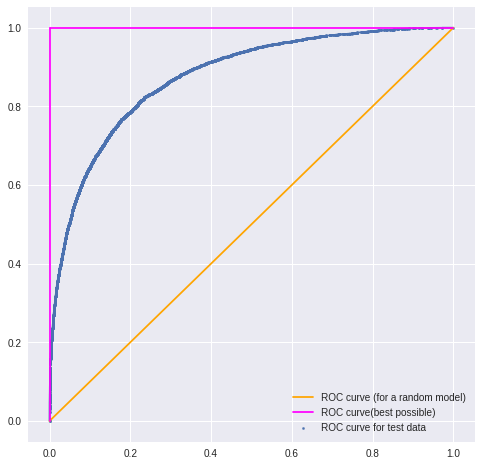

In [110]:
# plot roc curve
fig = plt.figure(figsize=(8, 8))
plt.scatter(fpr, tpr, s=5, label='ROC curve for test data')
plt.plot(fpr, tpr)
plt.plot(range(2), color='orange', label='ROC curve (for a random model)')
plt.plot([0, 0], range(2), color='magenta', label='ROC curve(best possible)')
plt.plot(range(2), [1, 1], color='magenta')
plt.legend()

plt.show()

# Predictions on df_test (unlabelled data)

In [0]:
# unlabelled dataset for for which predictions are to be submitted
dtest = xgb.DMatrix(df_test.values[:, 1:])

In [0]:
y_pred = trained_xgb.predict(dtest)

In [0]:
y_pred

In [0]:
y_pred_labels = [0 if x<=0.5 else 1 for x in y_pred]

In [0]:
# list(df_test.loc[:, 'ID_code'])

In [0]:
df_y_pred_labels = pd.DataFrame({
                                  'ID_code': list(df_test.loc[:, 'ID_code']),
                                  'target': y_pred_labels
})

In [0]:
df_y_pred_labels.shape

In [0]:
df_y_pred_labels.columns

In [0]:
df_y_pred_labels.head(2)

In [0]:
df_y_pred_labels.to_csv('/content/mydrive/My Drive/ML_Projects/Kaggle/Santander/test_results.csv',
                       encoding='utf-8', index=False)

In [0]:
df_y_pred_labels.shape